## Emulator notebook tests

In [1]:
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import cProfile
import emcee
import corner
# our own modules
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler
import data_MPGADGET
import z_emulator
import p1d_arxiv

In [2]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


In [3]:
skewers_label='Ns256_wM0.05'
#skewers_label=None
#basedir="/p1d_emulator/sim_suites/emulator_256_28082019/"
basedir=repo+"/p1d_emulator/sim_suites/emulator_256_15072019/"
p1d_label=None
undersample_z=1
paramList=["mF","sigT_Mpc","gamma","n_p","Delta2_p"]
max_arxiv_size=None
kmax_Mpc=8

In [4]:
## Load training set
archive=p1d_arxiv.ArxivP1D(basedir=basedir,
                            drop_tau_rescalings=True,z_max=4,nearest_tau=True,
                            drop_sim_number=50,
                            drop_temp_rescalings=True,skewers_label=skewers_label)

In [5]:
emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                max_arxiv_size=max_arxiv_size,z_max=4,
                                verbose=False,paramList=paramList,train=True,
                                emu_type="k_bin",passArxiv=archive,set_noise_var=1e-3,
                                drop_tau_rescalings=True,
                                drop_temp_rescalings=True,
                                emu_per_k=True)

 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
Training GP on 1592 points
Optimised
T

In [6]:
## Find emulator call for a random sim at z=2.25. Can be any sim
truth=p1d_arxiv.ArxivP1D(basedir=basedir,
                            drop_tau_rescalings=True,z_max=4,pick_sim_number=50,
                            drop_temp_rescalings=True,skewers_label=skewers_label)

## Set up k bins for emulator call
k_test=truth.data[1]["k_Mpc"][1:]
k_test=k_test[k_test<8]

 /home/chris/.local/lib/python3.5/site-packages/gp_emulator.py:296: RuntimeWarning:invalid value encountered in sqrt


[-884.67790771 -560.43156313 -426.8606248  -288.40237677 -188.13744352
 -193.15146967 -102.58695468  -95.3484042   -44.67854789  -17.5188364
   -8.42274973  -22.20598004    0.91590318   -8.92514191   -5.94068009
  -12.38139577  -18.09341697  -13.63828241  -17.84652945  -18.42391381
  -19.43093261  -18.70585654  -18.13747303  -17.43953087  -15.55944359
  -14.45441589  -13.16149122  -11.45417126]
[-286.07321016 -206.33655993 -127.769557     20.25929724   21.13128844
  -12.3626028    43.09733181   39.23028042   54.07763492   49.9949524
   63.14943627   27.86599319   39.41098489   22.84129762   18.52838497
    5.83463747   -3.95536851   -3.24181694   -9.50642664  -13.09686723
  -14.46326539  -15.58998712  -15.77767512  -15.82187401  -14.48016585
  -13.88085311  -13.03099167  -11.57997959]
[145.41129674  33.37402817 108.20257991 257.71073639 183.40648202
 142.23282158 155.89898394 148.79951876 131.24199914  98.87762461
 117.82735566  70.20524492  68.57784146  49.47385045  39.2582825
  22.70

Text(0.5, 0, 'k 1/Mpc')

 /usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning:findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


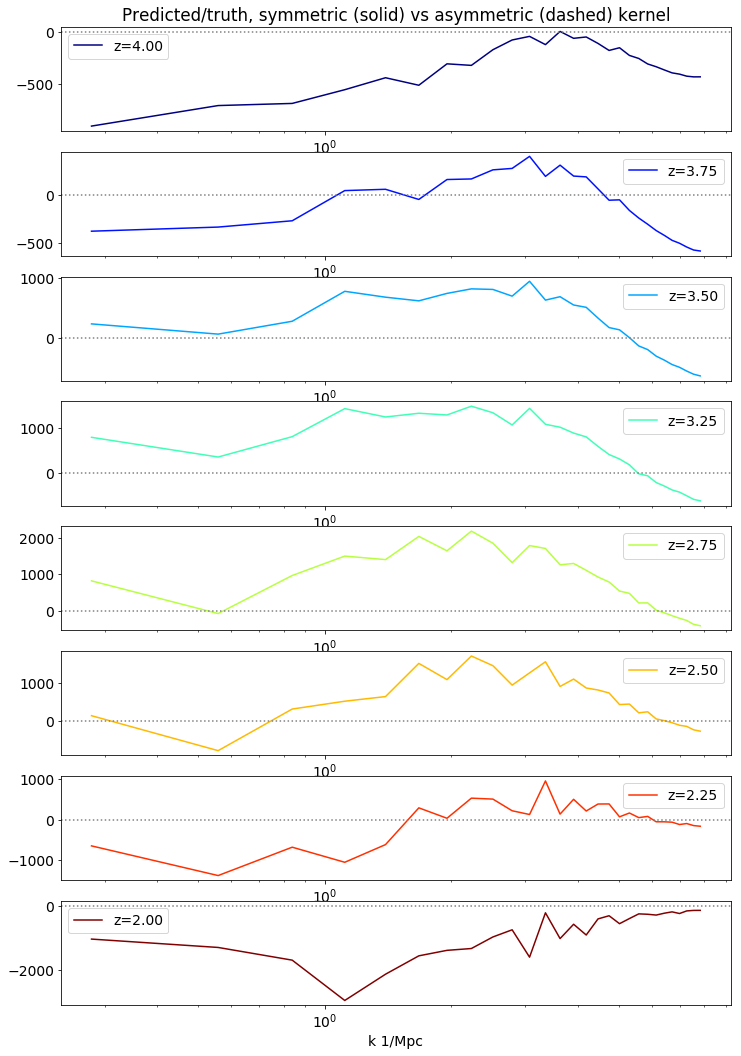

In [7]:
plt.figure(figsize=[12,18])
dex=0
for aa,item in enumerate(truth.data):
    plt.subplot(len(truth.data),1,aa+1)
    if aa==0:
        plt.title("Predicted/truth, symmetric (solid) vs asymmetric (dashed) kernel")
    col = plt.cm.jet(dex/(len(truth.data)-1))
    dex+=1
    emu_call={}
    for param in paramList:
        emu_call[param]=item[param]
    pred,err=emu.emulate_p1d_Mpc(emu_call,k_test,True,item["z"])
    print(pred)
    #pred_rbf,err_rbf=emu_rbf_only.emulate_p1d_Mpc(emu_call,k_test,True,item["z"])
    #pred_rbf_ard,err_rbf_ard=emu_rbf_ard.emulate_p1d_Mpc(emu_call,k_test,True,item["z"])
    ## Plot z with different limits
    plt.plot(k_test,pred/item["p1d_Mpc"][1:(len(k_test)+1)],color=col,linestyle="solid",label="z=%.2f" % item["z"])
    plt.fill_between(k_test,(pred+np.sqrt(np.diag(err)))/item["p1d_Mpc"][1:(len(k_test)+1)],
            (pred-np.sqrt(np.diag(err)))/item["p1d_Mpc"][1:(len(k_test)+1)],alpha=0.5,color=col)
    #plt.plot(k_test,pred_rbf/item["p1d_Mpc"][1:(len(k_test)+1)],color=col,linestyle="dashed",label="z=%.2f" % item["z"])
    #plt.fill_between(k_test,(pred_rbf+np.sqrt(np.diag(err_rbf)))/item["p1d_Mpc"][1:(len(k_test)+1)],
    #        (pred_rbf-np.sqrt(np.diag(err_rbf)))/item["p1d_Mpc"][1:(len(k_test)+1)],alpha=0.5,color=col)
    #plt.plot(k_test,pred_rbf_ard/item["p1d_Mpc"][1:(len(k_test)+1)],color=col,linestyle="dotted",label="z=%.2f" % item["z"])
    #plt.fill_between(k_test,(pred_rbf_ard+np.sqrt(np.diag(err_rbf_ard)))/item["p1d_Mpc"][1:(len(k_test)+1)],
    #        (pred_rbf_ard-np.sqrt(np.diag(err_rbf_ard)))/item["p1d_Mpc"][1:(len(k_test)+1)],alpha=0.5,color=col)
    plt.axhline(1,linestyle=":",color="gray")
    plt.xscale("log")
    plt.legend()

#plt.xscale("log")
plt.xlabel("k 1/Mpc")
#plt.savefig("symmetric_vs_asymmetric.pdf")

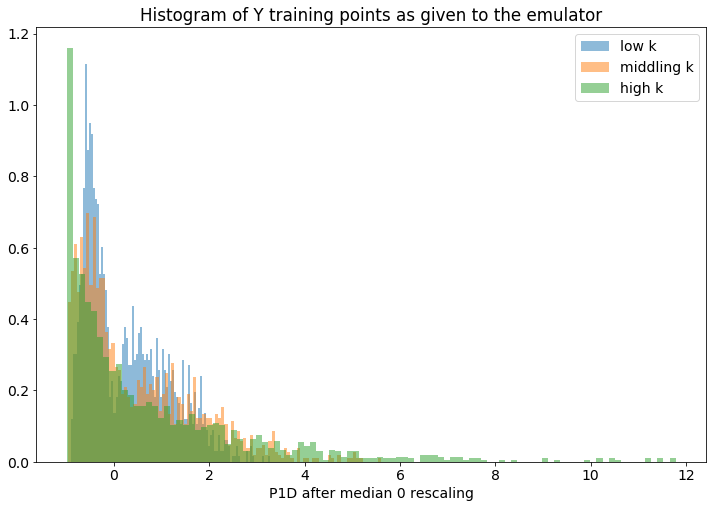

In [8]:
plt.figure(figsize=(12,8))
plt.title("Histogram of Y training points as given to the emulator")
_=plt.hist(emu.normspectra[:,2],bins=100,alpha=0.5,density=True,label="low k")
_=plt.hist(emu.normspectra[:,10],bins=100,alpha=0.5,density=True,label="middling k")
_=plt.hist(emu.normspectra[:,22],bins=100,alpha=0.5,density=True,label="high k")
#plt.xscale("log")
plt.xlabel("P1D after median 0 rescaling")
plt.legend()
plt.savefig("k_hist.pdf")

In [9]:
emu.training_k_bins

array([0.        , 0.27925268, 0.55850536, 0.83775804, 1.11701072,
       1.3962634 , 1.67551608, 1.95476876, 2.23402144, 2.51327412,
       2.7925268 , 3.07177948, 3.35103216, 3.63028484, 3.90953752,
       4.1887902 , 4.46804289, 4.74729557, 5.02654825, 5.30580093,
       5.58505361, 5.86430629, 6.14355897, 6.42281165, 6.70206433,
       6.98131701, 7.26056969, 7.53982237, 7.81907505, 8.09832773,
       8.37758041, 8.65683309, 8.93608577, 9.21533845, 9.49459113])

In [15]:
mean=np.empty(len(emu.training_k_bins)-1)
std=np.empty(len(emu.training_k_bins)-1)
for aa in range(1,len(emu.training_k_bins)):
    mean[aa-1]=np.mean(emu.normspectra[:,aa])
    std[aa-1]=np.std(emu.normspectra[:,aa])

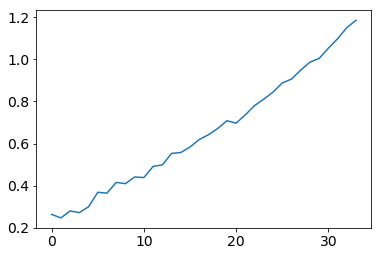

In [16]:
plt.plot(mean)

In [17]:
mean

array([0.26287304, 0.24618187, 0.279482  , 0.27131817, 0.29918448,
       0.36794358, 0.36410676, 0.41519404, 0.40911307, 0.44058942,
       0.43822947, 0.4911356 , 0.49831491, 0.55296681, 0.55718958,
       0.58342297, 0.61891102, 0.64183864, 0.67121237, 0.70841916,
       0.69669394, 0.73646564, 0.78049694, 0.81104887, 0.84430859,
       0.88799607, 0.9064759 , 0.94898586, 0.98689826, 1.00461186,
       1.05322269, 1.09834885, 1.15115628, 1.18626376])

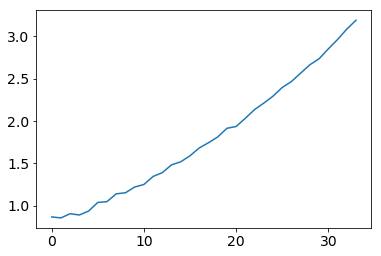

In [18]:
plt.plot(std)

In [14]:
std

array([8.65414296e-01, 8.53716592e-01, 9.03361100e-01, 8.88287974e-01,
       9.34651039e-01, 1.03648953e+00, 1.04616141e+00, 1.13832202e+00,
       1.15095362e+00, 1.21887047e+00, 1.24876313e+00, 1.34373022e+00,
       1.38901465e+00, 1.48115778e+00, 1.51718444e+00, 1.58806297e+00,
       1.68037541e+00, 1.74213094e+00, 1.81010464e+00, 1.91284995e+00,
       1.93422058e+00, 2.03165940e+00, 2.13388363e+00, 2.21048131e+00,
       2.29251861e+00, 2.39547176e+00, 2.46564508e+00, 2.56550817e+00,
       2.66396375e+00, 2.73479179e+00, 2.85177593e+00, 2.96221829e+00,
       3.08544117e+00, 3.18971617e+00, 1.97334056e-03])